In [2]:
import json
from pathlib import Path

file_path = Path("..") / "data" / "raw" / "trainining14b.json"

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

In [3]:

questions_list = data["questions"]

print(f"Total questions found: {len(questions_list)}")

# print(json.dumps(questions_list[0], indent=2))

Total questions found: 5729


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(questions_list)

# Quick look at the structure
print(f"DataFrame Shape: {df.shape}")
display(df.head(2))

DataFrame Shape: (5729, 12)


,body,documents,ideal_answer,concepts,type,id,snippets,triples,exact_answer,_body,_type,duplicate_tmp
0,Is Hirschsprung disease a mendelian or a multi...,"[http://www.ncbi.nlm.nih.gov/pubmed/15858239, ...","[Coding sequence mutations in RET, GDNF, EDNRB...",[http://www.disease-ontology.org/api/metadata/...,summary,55031181e9bde69634000014,"[{'offsetInBeginSection': 131, 'offsetInEndSec...",NaN,NaN,NaN,NaN,NaN
1,List signaling molecules (ligands) that intera...,"[http://www.ncbi.nlm.nih.gov/pubmed/23959273, ...",[The 7 known EGFR ligands are: epidermal grow...,[http://amigo.geneontology.org/cgi-bin/amigo/t...,list,55046d5ff8aee20f27000007,"[{'offsetInBeginSection': 1085, 'offsetInEndSe...",[{'p': 'http://purl.uniprot.org/core/encodedBy...,"[[epidermal growth factor], [betacellulin], [e...",NaN,NaN,NaN


/var/folders/w3/_9xfzs452hgfcph48cy0qchr0000gn/T/ipykernel_87828/3048501342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


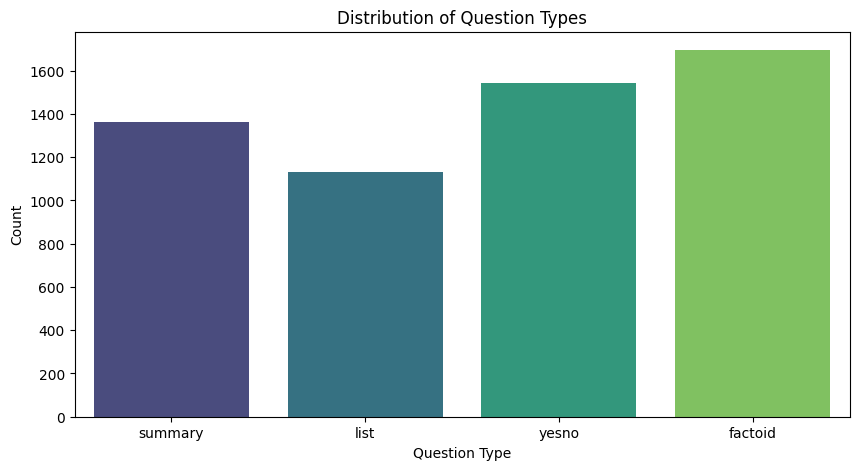

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Count')
plt.show()

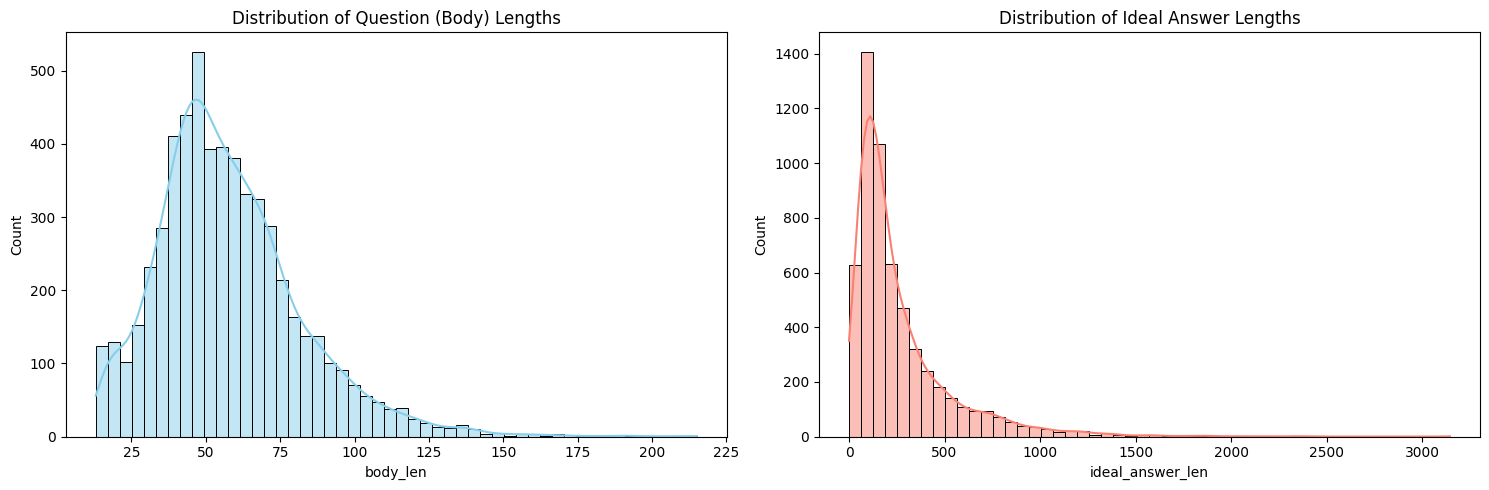

In [6]:
# Calculate lengths
df['body_len'] = df['body'].apply(len)
df['ideal_answer_len'] = df['ideal_answer'].apply(lambda x: len(x[0]) if isinstance(x, list) and x else 0)
df['num_snippets'] = df['snippets'].apply(len)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Question Lengths
sns.histplot(df['body_len'], bins=50, ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Distribution of Question (Body) Lengths')

# Plot Answer Lengths
sns.histplot(df['ideal_answer_len'], bins=50, ax=axes[1], color='salmon', kde=True)
axes[1].set_title('Distribution of Ideal Answer Lengths')

plt.tight_layout()
plt.show()

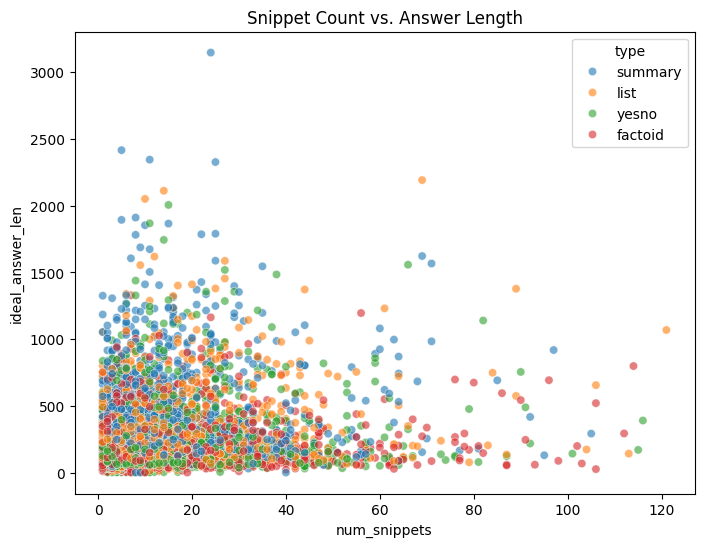

Average number of snippets per question type:
type
factoid    13.625369
list       15.251327
summary    13.534116
yesno      13.810513
Name: num_snippets, dtype: float64


In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='num_snippets', y='ideal_answer_len', hue='type', alpha=0.6)
plt.title('Snippet Count vs. Answer Length')
plt.show()

# Print some averages
print("Average number of snippets per question type:")
print(df.groupby('type')['num_snippets'].mean())